<a href="https://colab.research.google.com/github/Kunaldahiya2907/Marketing-Research-Methods---Kunal-Dahiya_JioInstitute/blob/main/Marketing_Mix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

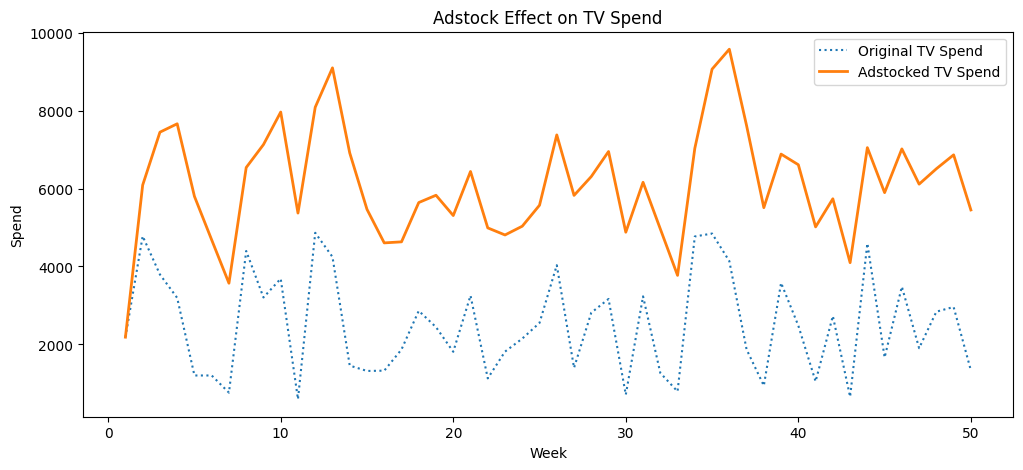

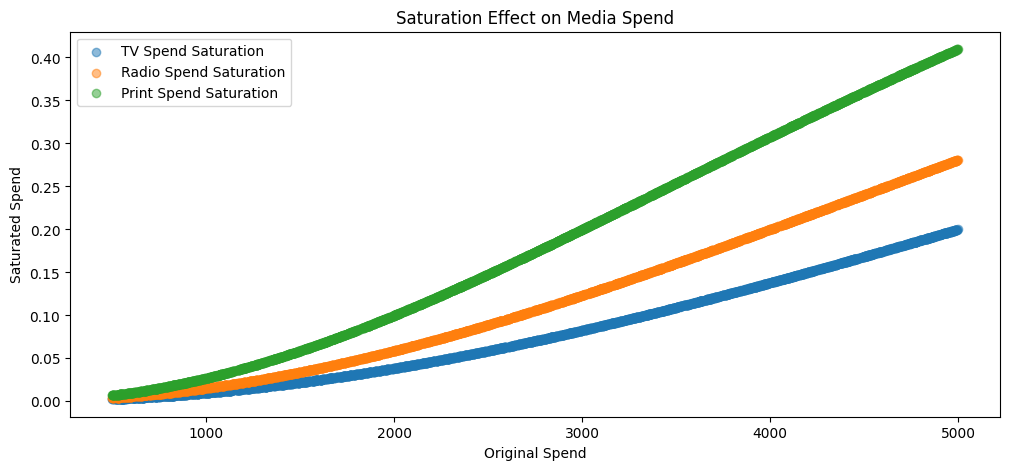

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
file_path = "/content/MMM brand data.csv"  # Update with correct path if needed
df = pd.read_csv(file_path)

# Define Adstock transformation
def adstock_transform(spend_series, decay_factor=0.5):
    adstocked = np.zeros_like(spend_series)
    adstocked[0] = spend_series[0]  # Initial value
    for t in range(1, len(spend_series)):
        adstocked[t] = spend_series[t] + decay_factor * adstocked[t - 1]
    return adstocked

# Define Saturation effect (Hill function)
def saturation_transform(spend_series, s=5000, h=2):
    return (spend_series**h) / (spend_series**h + s**h)

# Apply transformations to media spends
df["Adstock_TV"] = adstock_transform(df["TV_Spend"], decay_factor=0.6)
df["Adstock_Radio"] = adstock_transform(df["Radio_Spend"], decay_factor=0.5)
df["Adstock_Print"] = adstock_transform(df["Print_Spend"], decay_factor=0.4)

df["Saturated_TV"] = saturation_transform(df["TV_Spend"], s=10000, h=2)
df["Saturated_Radio"] = saturation_transform(df["Radio_Spend"], s=8000, h=2)
df["Saturated_Print"] = saturation_transform(df["Print_Spend"], s=6000, h=2)

# Plot Adstock effect visualization
plt.figure(figsize=(12, 5))
plt.plot(df["Week"][:50], df["TV_Spend"][:50], label="Original TV Spend", linestyle="dotted")
plt.plot(df["Week"][:50], df["Adstock_TV"][:50], label="Adstocked TV Spend", linewidth=2)
plt.xlabel("Week")
plt.ylabel("Spend")
plt.title("Adstock Effect on TV Spend")
plt.legend()
plt.show()

# Plot Saturation effect visualization
plt.figure(figsize=(12, 5))
plt.scatter(df["TV_Spend"], df["Saturated_TV"], alpha=0.5, label="TV Spend Saturation")
plt.scatter(df["Radio_Spend"], df["Saturated_Radio"], alpha=0.5, label="Radio Spend Saturation")
plt.scatter(df["Print_Spend"], df["Saturated_Print"], alpha=0.5, label="Print Spend Saturation")
plt.xlabel("Original Spend")
plt.ylabel("Saturated Spend")
plt.title("Saturation Effect on Media Spend")
plt.legend()
plt.show()


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/

Optimized Budget Allocation:
TV Spend: 8016.97
Radio Spend: 150.23
Print Spend: 0.00
Total Budget: 8167.20


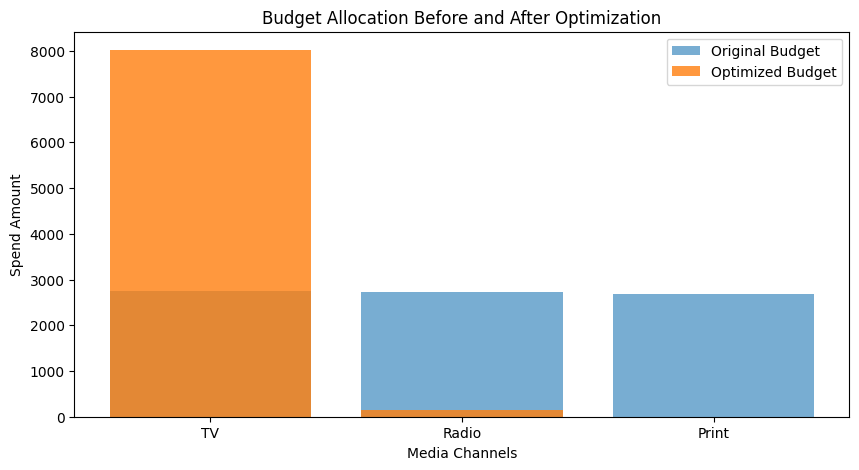

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from sklearn.linear_model import LinearRegression

# Load dataset
file_path = "/content/MMM brand data.csv"  # Update with correct path if needed
df = pd.read_csv(file_path)

# Define Adstock transformation
def adstock_transform(spend_series, decay_factor=0.5):
    adstocked = np.zeros_like(spend_series)
    adstocked[0] = spend_series[0]  # Initial value
    for t in range(1, len(spend_series)):
        adstocked[t] = spend_series[t] + decay_factor * adstocked[t - 1]
    return adstocked

# Define Saturation transformation (Hill function)
def saturation_transform(spend_series, s=5000, h=2):
    return (spend_series**h) / (spend_series**h + s**h)

# Apply transformations to media spends
df["Adstock_TV"] = adstock_transform(df["TV_Spend"], decay_factor=0.6)
df["Adstock_Radio"] = adstock_transform(df["Radio_Spend"], decay_factor=0.5)
df["Adstock_Print"] = adstock_transform(df["Print_Spend"], decay_factor=0.4)

df["Saturated_TV"] = saturation_transform(df["TV_Spend"], s=10000, h=2)
df["Saturated_Radio"] = saturation_transform(df["Radio_Spend"], s=8000, h=2)
df["Saturated_Print"] = saturation_transform(df["Print_Spend"], s=6000, h=2)

# Prepare data for regression model
X = df[["Adstock_TV", "Adstock_Radio", "Adstock_Print", "Saturated_TV", "Saturated_Radio", "Saturated_Print"]]
y = df["Sales"]

# Train regression model
model = LinearRegression()
model.fit(X, y)

# Define objective function for optimization (negative sales because we maximize)
def objective(spend):
    adstock_tv = adstock_transform(np.array([spend[0]]*len(df)), decay_factor=0.6)[-1]
    adstock_radio = adstock_transform(np.array([spend[1]]*len(df)), decay_factor=0.5)[-1]
    adstock_print = adstock_transform(np.array([spend[2]]*len(df)), decay_factor=0.4)[-1]

    saturated_tv = saturation_transform(spend[0], s=10000, h=2)
    saturated_radio = saturation_transform(spend[1], s=8000, h=2)
    saturated_print = saturation_transform(spend[2], s=6000, h=2)

    X_test = np.array([[adstock_tv, adstock_radio, adstock_print, saturated_tv, saturated_radio, saturated_print]])
    predicted_sales = model.predict(X_test)[0]

    return -predicted_sales  # We minimize negative sales to maximize it

# Set initial budget (current spend levels)
initial_budget = [df["TV_Spend"].mean(), df["Radio_Spend"].mean(), df["Print_Spend"].mean()]

# Budget constraint (Total Budget must remain the same)
total_budget = sum(initial_budget)

def budget_constraint(spend):
    return total_budget - sum(spend)

# Bounds: Ensure spend stays positive
bounds = [(0, total_budget), (0, total_budget), (0, total_budget)]

# Define constraints
constraints = {"type": "eq", "fun": budget_constraint}

# Perform optimization
optimized_result = minimize(objective, initial_budget, bounds=bounds, constraints=constraints, method='SLSQP')

# Extract optimized spends
optimized_tv, optimized_radio, optimized_print = optimized_result.x

# Print results
print("Optimized Budget Allocation:")
print(f"TV Spend: {optimized_tv:.2f}")
print(f"Radio Spend: {optimized_radio:.2f}")
print(f"Print Spend: {optimized_print:.2f}")
print(f"Total Budget: {sum(optimized_result.x):.2f}")

# Visualize original vs optimized budget allocation
channels = ["TV", "Radio", "Print"]
original_budget = initial_budget
optimized_budget = [optimized_tv, optimized_radio, optimized_print]

plt.figure(figsize=(10, 5))
plt.bar(channels, original_budget, alpha=0.6, label="Original Budget")
plt.bar(channels, optimized_budget, alpha=0.8, label="Optimized Budget")
plt.xlabel("Media Channels")
plt.ylabel("Spend Amount")
plt.title("Budget Allocation Before and After Optimization")
plt.legend()
plt.show()


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/

Optimized Budget Allocation:
TV Spend: 5458.36
Radio Spend: 1362.21
Print Spend: 1346.63
Total Budget: 8167.20


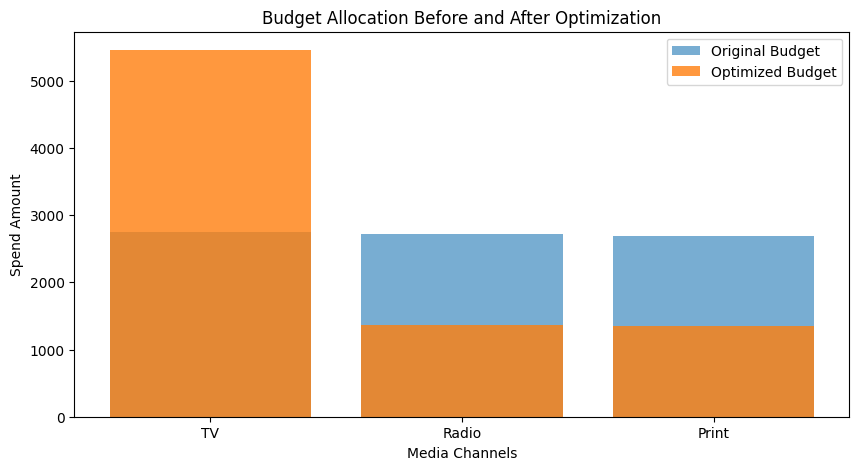

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from sklearn.linear_model import LinearRegression

# Load dataset
file_path = "/content/MMM brand data.csv"  # Update with correct path if needed
df = pd.read_csv(file_path)

# Define Adstock transformation
def adstock_transform(spend_series, decay_factor=0.5):
    adstocked = np.zeros_like(spend_series)
    adstocked[0] = spend_series[0]  # Initial value
    for t in range(1, len(spend_series)):
        adstocked[t] = spend_series[t] + decay_factor * adstocked[t - 1]
    return adstocked

# Define Saturation transformation (Hill function)
def saturation_transform(spend_series, s=5000, h=2):
    return (spend_series**h) / (spend_series**h + s**h)

# Apply transformations to media spends
df["Adstock_TV"] = adstock_transform(df["TV_Spend"], decay_factor=0.6)
df["Adstock_Radio"] = adstock_transform(df["Radio_Spend"], decay_factor=0.5)
df["Adstock_Print"] = adstock_transform(df["Print_Spend"], decay_factor=0.4)

df["Saturated_TV"] = saturation_transform(df["TV_Spend"], s=10000, h=2)
df["Saturated_Radio"] = saturation_transform(df["Radio_Spend"], s=8000, h=2)
df["Saturated_Print"] = saturation_transform(df["Print_Spend"], s=6000, h=2)

# Prepare data for regression model
X = df[["Adstock_TV", "Adstock_Radio", "Adstock_Print", "Saturated_TV", "Saturated_Radio", "Saturated_Print"]]
y = df["Sales"]

# Train regression model
model = LinearRegression()
model.fit(X, y)

# Define objective function for optimization (negative sales because we maximize)
def objective(spend):
    adstock_tv = adstock_transform(np.array([spend[0]]*len(df)), decay_factor=0.6)[-1]
    adstock_radio = adstock_transform(np.array([spend[1]]*len(df)), decay_factor=0.5)[-1]
    adstock_print = adstock_transform(np.array([spend[2]]*len(df)), decay_factor=0.4)[-1]

    saturated_tv = saturation_transform(spend[0], s=10000, h=2)
    saturated_radio = saturation_transform(spend[1], s=8000, h=2)
    saturated_print = saturation_transform(spend[2], s=6000, h=2)

    X_test = np.array([[adstock_tv, adstock_radio, adstock_print, saturated_tv, saturated_radio, saturated_print]])
    predicted_sales = model.predict(X_test)[0]

    return -predicted_sales  # We minimize negative sales to maximize it

# Set initial budget (current spend levels)
initial_budget = [df["TV_Spend"].mean(), df["Radio_Spend"].mean(), df["Print_Spend"].mean()]

# Budget constraint (Total Budget must remain the same)
total_budget = sum(initial_budget)

def budget_constraint(spend):
    return total_budget - sum(spend)

# Define minimum spend constraints (50% of past average spend)
min_spend_tv = 0.5 * df["TV_Spend"].mean()
min_spend_radio = 0.5 * df["Radio_Spend"].mean()
min_spend_print = 0.5 * df["Print_Spend"].mean()

# Bounds: Ensure spend stays within minimum and maximum (budget limits)
bounds = [(min_spend_tv, total_budget), (min_spend_radio, total_budget), (min_spend_print, total_budget)]

# Define constraints
constraints = {"type": "eq", "fun": budget_constraint}

# Perform optimization
optimized_result = minimize(objective, initial_budget, bounds=bounds, constraints=constraints, method='SLSQP')

# Extract optimized spends
optimized_tv, optimized_radio, optimized_print = optimized_result.x

# Print results
print("Optimized Budget Allocation:")
print(f"TV Spend: {optimized_tv:.2f}")
print(f"Radio Spend: {optimized_radio:.2f}")
print(f"Print Spend: {optimized_print:.2f}")
print(f"Total Budget: {sum(optimized_result.x):.2f}")

# Visualize original vs optimized budget allocation
channels = ["TV", "Radio", "Print"]
original_budget = initial_budget
optimized_budget = [optimized_tv, optimized_radio, optimized_print]

plt.figure(figsize=(10, 5))
plt.bar(channels, original_budget, alpha=0.6, label="Original Budget")
plt.bar(channels, optimized_budget, alpha=0.8, label="Optimized Budget")
plt.xlabel("Media Channels")
plt.ylabel("Spend Amount")
plt.title("Budget Allocation Before and After Optimization")
plt.legend()
plt.show()


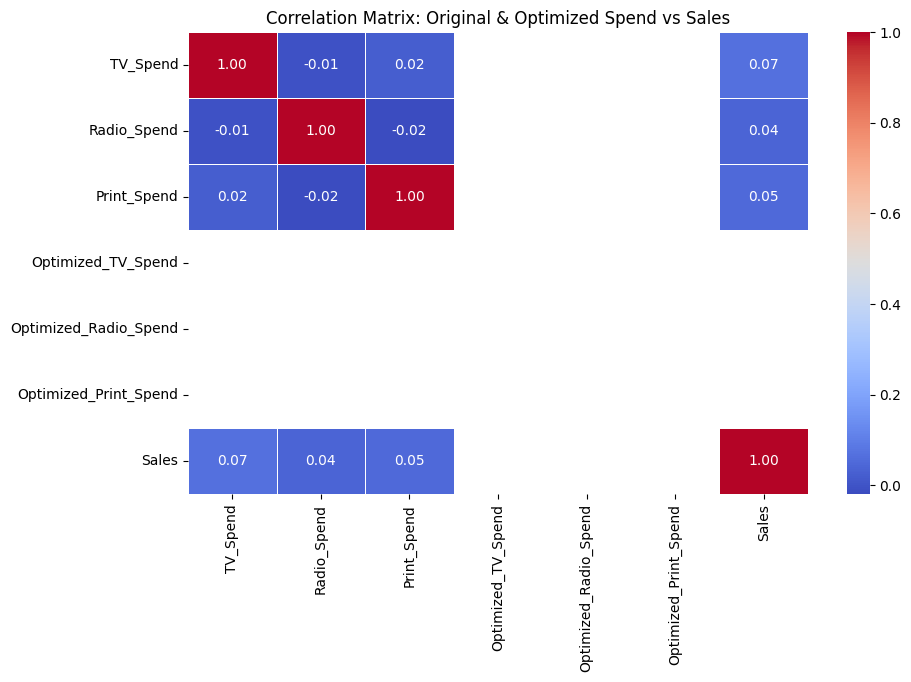

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure optimized spend values are replicated for all rows to match dataframe dimensions
df["Optimized_TV_Spend"] = optimized_tv
df["Optimized_Radio_Spend"] = optimized_radio
df["Optimized_Print_Spend"] = optimized_print

# Create a correlation matrix including both original and optimized spends
correlation_matrix = df[[
    "TV_Spend", "Radio_Spend", "Print_Spend",
    "Optimized_TV_Spend", "Optimized_Radio_Spend", "Optimized_Print_Spend",
    "Sales"
]].corr()

# Plot correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix: Original & Optimized Spend vs Sales")
plt.show()


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/

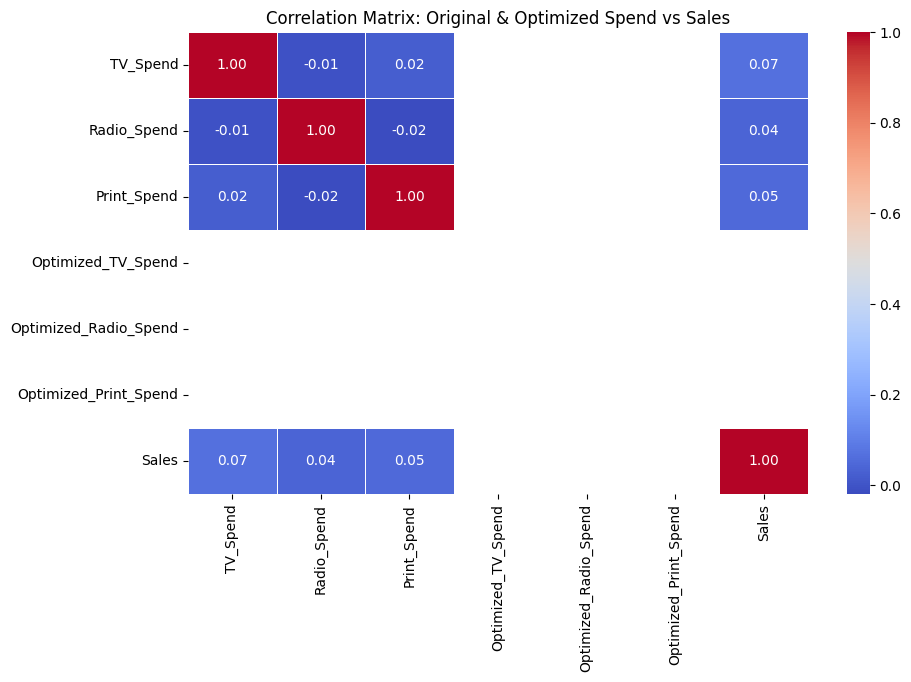

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from sklearn.linear_model import LinearRegression

# Load dataset
file_path = "/content/MMM brand data.csv"  # Update with correct path if needed
df = pd.read_csv(file_path)

# Define Adstock transformation
def adstock_transform(spend_series, decay_factor=0.5):
    adstocked = np.zeros_like(spend_series)
    adstocked[0] = spend_series[0]  # Initial value
    for t in range(1, len(spend_series)):
        adstocked[t] = spend_series[t] + decay_factor * adstocked[t - 1]
    return adstocked

# Define Saturation transformation (Hill function)
def saturation_transform(spend_series, s=5000, h=2):
    return (spend_series**h) / (spend_series**h + s**h)

# Apply transformations to media spends
df["Adstock_TV"] = adstock_transform(df["TV_Spend"], decay_factor=0.6)
df["Adstock_Radio"] = adstock_transform(df["Radio_Spend"], decay_factor=0.5)
df["Adstock_Print"] = adstock_transform(df["Print_Spend"], decay_factor=0.4)

df["Saturated_TV"] = saturation_transform(df["TV_Spend"], s=10000, h=2)
df["Saturated_Radio"] = saturation_transform(df["Radio_Spend"], s=8000, h=2)
df["Saturated_Print"] = saturation_transform(df["Print_Spend"], s=6000, h=2)

# Prepare data for regression model
X = df[["Adstock_TV", "Adstock_Radio", "Adstock_Print", "Saturated_TV", "Saturated_Radio", "Saturated_Print"]]
y = df["Sales"]

# Train regression model
model = LinearRegression()
model.fit(X, y)

# Define objective function for optimization (negative sales because we maximize)
def objective(spend):
    adstock_tv = adstock_transform(np.array([spend[0]]*len(df)), decay_factor=0.6)[-1]
    adstock_radio = adstock_transform(np.array([spend[1]]*len(df)), decay_factor=0.5)[-1]
    adstock_print = adstock_transform(np.array([spend[2]]*len(df)), decay_factor=0.4)[-1]

    saturated_tv = saturation_transform(spend[0], s=10000, h=2)
    saturated_radio = saturation_transform(spend[1], s=8000, h=2)
    saturated_print = saturation_transform(spend[2], s=6000, h=2)

    X_test = np.array([[adstock_tv, adstock_radio, adstock_print, saturated_tv, saturated_radio, saturated_print]])
    predicted_sales = model.predict(X_test)[0]

    return -predicted_sales  # We minimize negative sales to maximize it

# Set initial budget (current spend levels)
initial_budget = [df["TV_Spend"].mean(), df["Radio_Spend"].mean(), df["Print_Spend"].mean()]

# Budget constraint (Total Budget must remain the same)
total_budget = sum(initial_budget)

def budget_constraint(spend):
    return total_budget - sum(spend)

# Define minimum spend constraints (50% of past average spend)
min_spend_tv = 0.5 * df["TV_Spend"].mean()
min_spend_radio = 0.5 * df["Radio_Spend"].mean()
min_spend_print = 0.5 * df["Print_Spend"].mean()

# Bounds: Ensure spend stays within minimum and maximum (budget limits)
bounds = [(min_spend_tv, total_budget), (min_spend_radio, total_budget), (min_spend_print, total_budget)]

# Define constraints
constraints = {"type": "eq", "fun": budget_constraint}

# Perform optimization
optimized_result = minimize(objective, initial_budget, bounds=bounds, constraints=constraints, method='SLSQP')

# Extract optimized spends
optimized_tv, optimized_radio, optimized_print = optimized_result.x

# Ensure optimized spend values are replicated for all rows to match dataframe dimensions
df["Optimized_TV_Spend"] = optimized_tv
df["Optimized_Radio_Spend"] = optimized_radio
df["Optimized_Print_Spend"] = optimized_print

# Create a correlation matrix including both original and optimized spends
correlation_matrix = df[[
    "TV_Spend", "Radio_Spend", "Print_Spend",
    "Optimized_TV_Spend", "Optimized_Radio_Spend", "Optimized_Print_Spend",
    "Sales"
]].corr()

# Plot correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix: Original & Optimized Spend vs Sales")
plt.show()


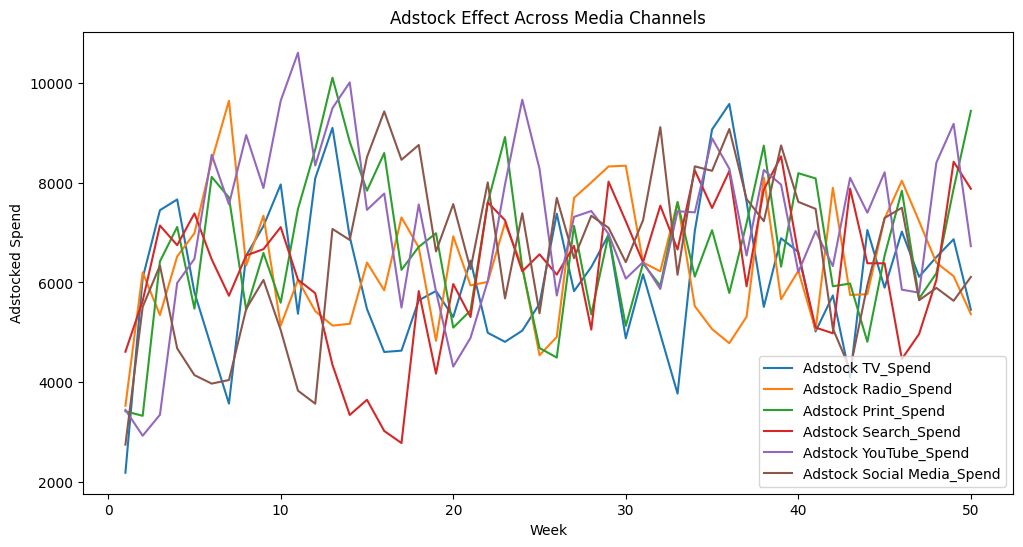

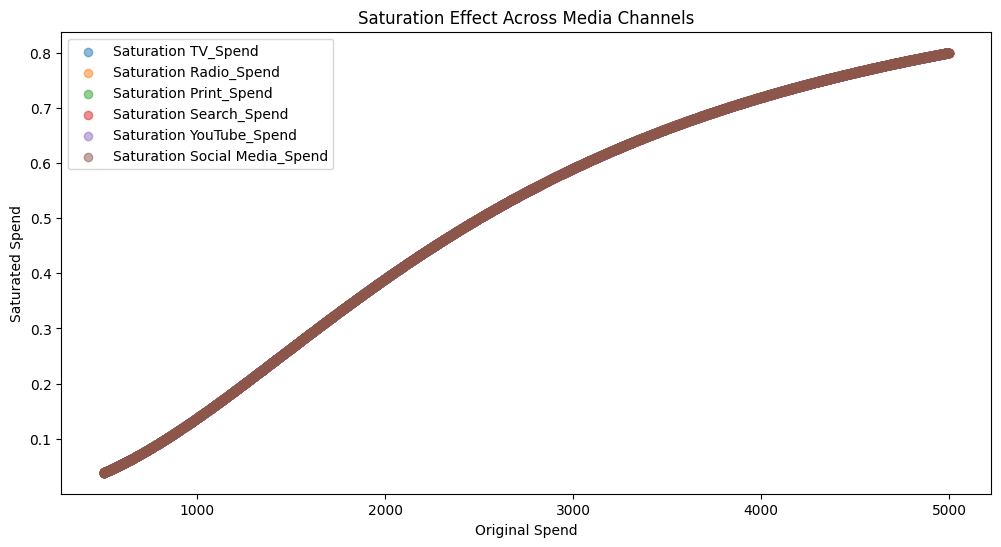

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load dataset
file_path = "/content/MMM brand data.csv"  # Update with correct path if needed
df = pd.read_csv(file_path)

# Identify all media spend columns (excluding non-media columns)
media_columns = ["TV_Spend", "Radio_Spend", "Print_Spend", "Search_Spend", "YouTube_Spend", "Social Media_Spend"]

# Define Adstock transformation
def adstock_transform(spend_series, decay_factor=0.5):
    adstocked = np.zeros_like(spend_series)
    adstocked[0] = spend_series[0]  # Initial value
    for t in range(1, len(spend_series)):
        adstocked[t] = spend_series[t] + decay_factor * adstocked[t - 1]
    return adstocked

# Define Saturation transformation (Hill function)
def saturation_transform(spend_series, s=5000, h=2):
    return (spend_series**h) / (spend_series**h + s**h)

# Apply Adstock and Saturation effects to all media channels
for media in media_columns:
    df[f"Adstock_{media}"] = adstock_transform(df[media], decay_factor=0.6)  # Adjust decay factor as needed
    df[f"Saturated_{media}"] = saturation_transform(df[media], s=df[media].max()/2, h=2)  # Adjust saturation params

# Plot Adstock effect for all media channels
plt.figure(figsize=(12, 6))
for media in media_columns:
    plt.plot(df["Week"][:50], df[f"Adstock_{media}"][:50], label=f"Adstock {media}")
plt.xlabel("Week")
plt.ylabel("Adstocked Spend")
plt.title("Adstock Effect Across Media Channels")
plt.legend()
plt.show()

# Plot Saturation effect for all media channels
plt.figure(figsize=(12, 6))
for media in media_columns:
    plt.scatter(df[media], df[f"Saturated_{media}"], alpha=0.5, label=f"Saturation {media}")
plt.xlabel("Original Spend")
plt.ylabel("Saturated Spend")
plt.title("Saturation Effect Across Media Channels")
plt.legend()
plt.show()


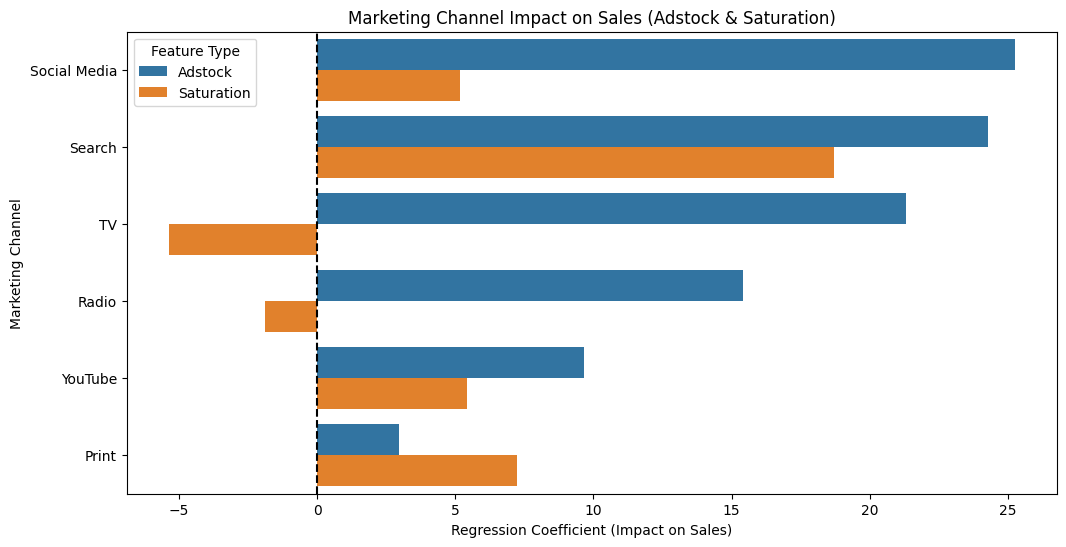

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# Load dataset
file_path = "/content/MMM brand data.csv"  # Update with correct path if needed
df = pd.read_csv(file_path)

# Identify all media spend columns
media_columns = ["TV_Spend", "Radio_Spend", "Print_Spend", "Search_Spend", "YouTube_Spend", "Social Media_Spend"]

# Define Adstock transformation
def adstock_transform(spend_series, decay_factor=0.5):
    adstocked = np.zeros_like(spend_series)
    adstocked[0] = spend_series[0]  # Initial value
    for t in range(1, len(spend_series)):
        adstocked[t] = spend_series[t] + decay_factor * adstocked[t - 1]
    return adstocked

# Define Saturation transformation (Hill function)
def saturation_transform(spend_series, s=5000, h=2):
    return (spend_series**h) / (spend_series**h + s**h)

# Apply Adstock and Saturation transformations
for media in media_columns:
    df[f"Adstock_{media}"] = adstock_transform(df[media], decay_factor=0.6)
    df[f"Saturated_{media}"] = saturation_transform(df[media], s=df[media].max()/2, h=2)

# Prepare feature matrix (X) and target variable (y)
X = df[[f"Adstock_{media}" for media in media_columns] + [f"Saturated_{media}" for media in media_columns]]
y = df["Sales"]

# Standardize features for better interpretability
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train Multiple Linear Regression Model
model = LinearRegression()
model.fit(X_scaled, y)

# Get coefficients & impact of each channel
impact_df = pd.DataFrame({
    "Marketing Channel": [media.replace("_Spend", "") for media in media_columns] * 2,
    "Feature Type": ["Adstock"] * len(media_columns) + ["Saturation"] * len(media_columns),
    "Impact on Sales": model.coef_
})

# Sort by absolute impact
impact_df["Absolute Impact"] = impact_df["Impact on Sales"].abs()
impact_df = impact_df.sort_values(by="Absolute Impact", ascending=False).drop(columns=["Absolute Impact"])

# Plot feature importance
plt.figure(figsize=(12, 6))
sns.barplot(x="Impact on Sales", y="Marketing Channel", hue="Feature Type", data=impact_df)
plt.axvline(0, color="black", linestyle="dashed")
plt.xlabel("Regression Coefficient (Impact on Sales)")
plt.title("Marketing Channel Impact on Sales (Adstock & Saturation)")
plt.legend(title="Feature Type")
plt.show()


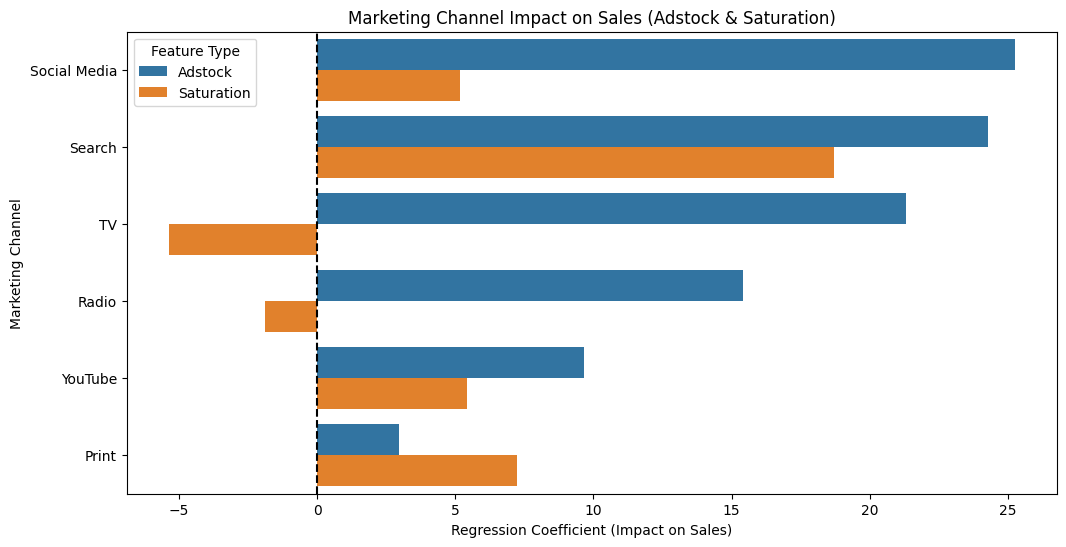

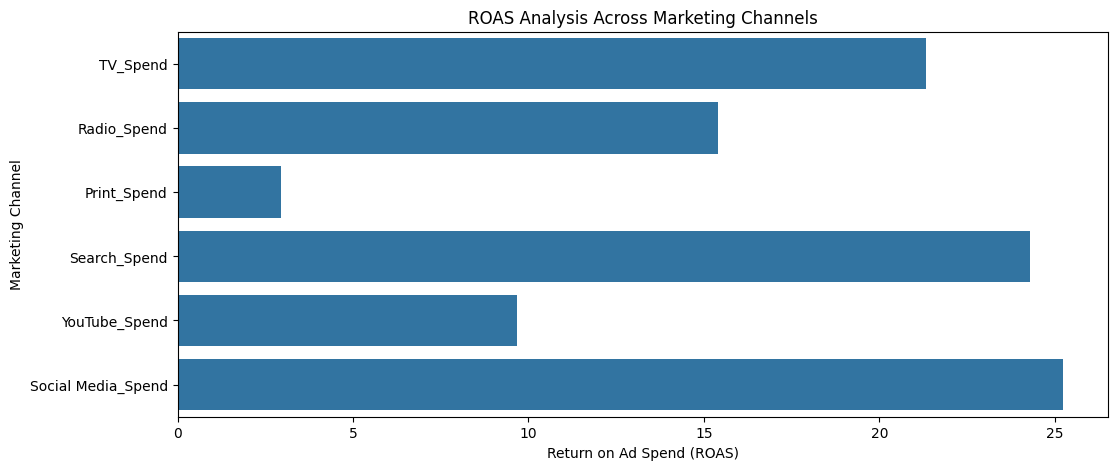

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/ut

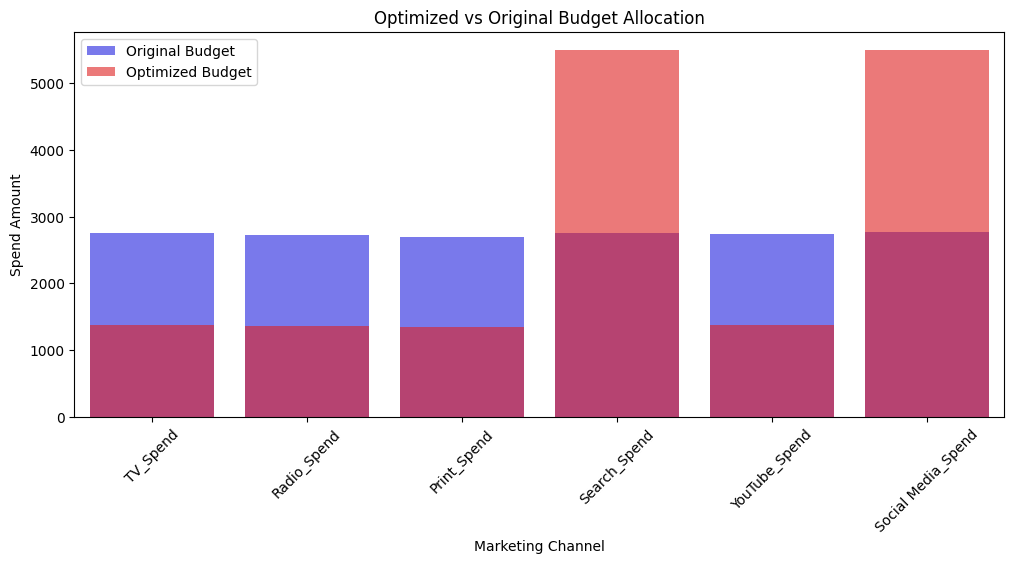

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import minimize
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# Load dataset
file_path = "MMM brand data.csv"  # Update with correct path if needed
df = pd.read_csv(file_path)

# Identify all media spend columns
media_columns = ["TV_Spend", "Radio_Spend", "Print_Spend", "Search_Spend", "YouTube_Spend", "Social Media_Spend"]

# Define Adstock transformation
def adstock_transform(spend_series, decay_factor=0.5):
    adstocked = np.zeros_like(spend_series)
    adstocked[0] = spend_series[0]  # Initial value
    for t in range(1, len(spend_series)):
        adstocked[t] = spend_series[t] + decay_factor * adstocked[t - 1]
    return adstocked

# Define Saturation transformation (Hill function)
def saturation_transform(spend_series, s=5000, h=2):
    return (spend_series**h) / (spend_series**h + s**h)

# Apply Adstock and Saturation transformations
for media in media_columns:
    df[f"Adstock_{media}"] = adstock_transform(df[media], decay_factor=0.6)
    df[f"Saturated_{media}"] = saturation_transform(df[media], s=df[media].max()/2, h=2)

# Prepare feature matrix (X) and target variable (y)
X = df[[f"Adstock_{media}" for media in media_columns] + [f"Saturated_{media}" for media in media_columns]]
y = df["Sales"]

# Standardize features for better interpretability
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train Multiple Linear Regression Model
model = LinearRegression()
model.fit(X_scaled, y)

# Get coefficients & impact of each channel
impact_df = pd.DataFrame({
    "Marketing Channel": [media.replace("_Spend", "") for media in media_columns] * 2,
    "Feature Type": ["Adstock"] * len(media_columns) + ["Saturation"] * len(media_columns),
    "Impact on Sales": model.coef_
})

# Sort by absolute impact
impact_df["Absolute Impact"] = impact_df["Impact on Sales"].abs()
impact_df = impact_df.sort_values(by="Absolute Impact", ascending=False).drop(columns=["Absolute Impact"])

# Plot feature importance
plt.figure(figsize=(12, 6))
sns.barplot(x="Impact on Sales", y="Marketing Channel", hue="Feature Type", data=impact_df)
plt.axvline(0, color="black", linestyle="dashed")
plt.xlabel("Regression Coefficient (Impact on Sales)")
plt.title("Marketing Channel Impact on Sales (Adstock & Saturation)")
plt.legend(title="Feature Type")
plt.show()

# Calculate ROAS (Return on Ad Spend)
df["Predicted_Sales"] = model.predict(X_scaled)
roas_df = pd.DataFrame({
    "Marketing Channel": media_columns,
    "Total Spend": [df[media].sum() for media in media_columns],
    "Incremental Sales": model.coef_[:len(media_columns)] * df[media_columns].sum().values,
})
roas_df["ROAS"] = roas_df["Incremental Sales"] / roas_df["Total Spend"]

# Plot ROAS
plt.figure(figsize=(12, 5))
sns.barplot(x="ROAS", y="Marketing Channel", data=roas_df)
plt.xlabel("Return on Ad Spend (ROAS)")
plt.title("ROAS Analysis Across Marketing Channels")
plt.show()

# Budget Optimization Function
def objective(spend):
    adstock_values = [adstock_transform(np.array([s] * len(df)), decay_factor=0.6)[-1] for s in spend]
    saturated_values = [saturation_transform(s, s=max(spend)/2, h=2) for s in spend]
    X_test = np.array([adstock_values + saturated_values]).reshape(1, -1)
    predicted_sales = model.predict(scaler.transform(X_test))[0]
    return -predicted_sales  # Maximize sales by minimizing negative sales

# Initial Budget (Current Spend Levels)
initial_budget = [df[media].mean() for media in media_columns]
total_budget = sum(initial_budget)

# Budget Constraints (Total budget remains the same)
def budget_constraint(spend):
    return total_budget - sum(spend)

# Bounds: Ensure each channel receives at least 50% of its current average spend
min_spend = [0.5 * df[media].mean() for media in media_columns]
bounds = [(m, total_budget) for m in min_spend]

# Run Optimization
optimized_result = minimize(objective, initial_budget, bounds=bounds, constraints={"type": "eq", "fun": budget_constraint}, method="SLSQP")
optimized_spend = optimized_result.x

# Optimized Budget Allocation
optimized_budget_df = pd.DataFrame({
    "Marketing Channel": media_columns,
    "Original Spend": initial_budget,
    "Optimized Spend": optimized_spend
})

# Plot Original vs Optimized Budget Allocation
plt.figure(figsize=(12, 5))
sns.barplot(x="Marketing Channel", y="Original Spend", data=optimized_budget_df, color="blue", alpha=0.6, label="Original Budget")
sns.barplot(x="Marketing Channel", y="Optimized Spend", data=optimized_budget_df, color="red", alpha=0.6, label="Optimized Budget")
plt.xlabel("Marketing Channel")
plt.ylabel("Spend Amount")
plt.title("Optimized vs Original Budget Allocation")
plt.legend()
plt.xticks(rotation=45)
plt.show()
